In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\diego\Downloads\DataScience\cp1\dataset_prova.csv')
df

,Setor,Idade,Experiência (anos),Salário (R$),Horas de Trabalho/Semana,Satisfação (1-5)
0,RH,39,18,9225.487461,38.423171,4
1,Financeiro,47,29,11436.227507,30.729479,5
2,Vendas,55,37,7363.555229,49.364169,4
3,RH,31,11,14661.384993,35.313320,2
4,RH,57,36,14549.367539,58.213758,2
...,...,...,...,...,...,...
95,TI,58,39,9031.645117,52.735383,5
96,TI,54,34,9922.846616,30.431805,3
97,Financeiro,45,27,8910.212326,33.482179,3
98,TI,36,18,5342.915854,31.380079,1


In [ ]:
# ANÁLISE DE GRÁFICOS


HISTOGRAMA

O histograma não foi a melhor escolha para demonstrar a distribuição de funcionários por setor. Isso porque ele é utilizado mais especificamente para visualizar dados numéricos e contínuos como salários e idades. No histograma, o eixo x vai repreentar intervalos numéricos e não setores. Já a distribuição de funcionários por setor se caracteriza por ser dados categóricos e o gráfico que melhor representaria esses dados seria o de barras. Nesse caso, cada setor (RH, Vendas) seria uma categoria no eixo x e o números de funcionários por setor ficaria no eixou y (quantidade e não frequência de ocorrência). Com o gráfico de barras, há uma comparação clara entre os setores. Cada setor é representado individualmente com sua quantidade de funcionários. No histograma, ele tentaria agrupar os setores como se fossem números e não há uma relação de continuidade entre eles. 

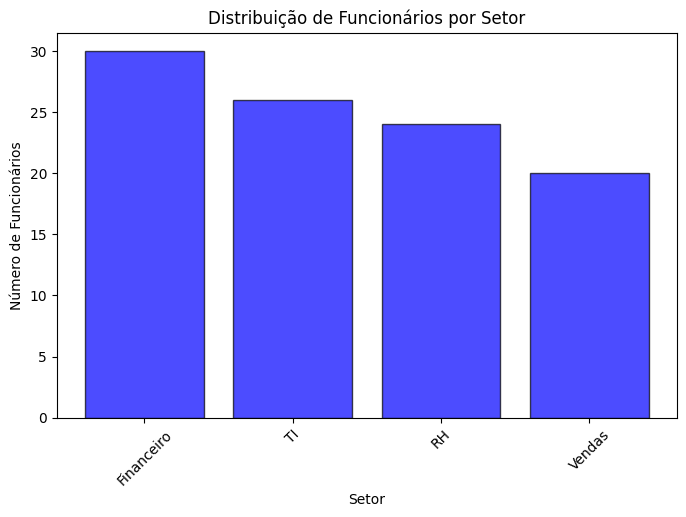

In [ ]:
setor_quantidade = df['Setor'].value_counts()
setor_quantidade

plt.figure(figsize=(8,5))
plt.bar(setor_quantidade.index, setor_quantidade.values, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Setor')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição de Funcionários por Setor')

plt.xticks(rotation=45)
plt.show()

GRÁFICO DE LINHAS
O gráfico de linhas foi uma boa opção, mas seria melhor representado se fosse feito nele a relação entre tempo trabalhado com o salário do funcionário em seu setor, mas não salário versus setor. Isso porque, dessa forma, é possível mostrar a variação salarial ao longo do tempo. Sendo assim, é preciso fazer a correção do gráfico. Além disso, é interessante separar os gráficos para que a visualização fique mais limpa e melhor de se compreender. Importante ressaltar que as linhas dos gráficos não se conectam, pois nem todos os setores possuem valores de salário registrados para todos os anos de experiência.  

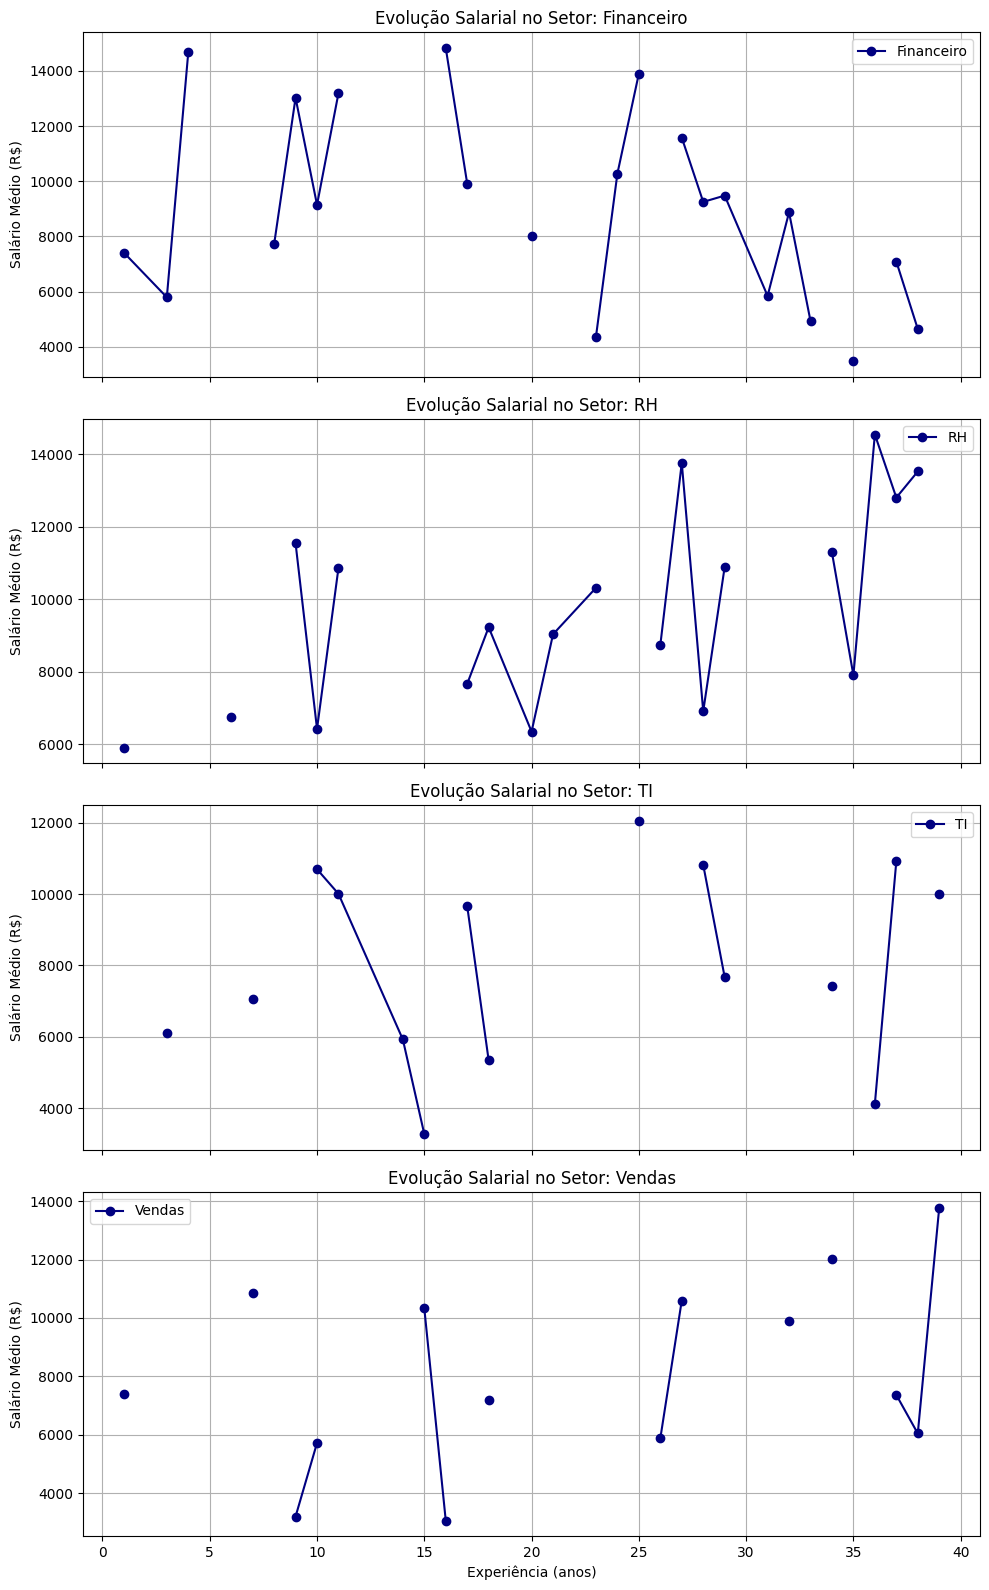

In [26]:
salario_tempo = df.groupby(['Experiência (anos)', 'Setor'])['Salário (R$)'].mean().unstack()
salario_tempo


salario_tempo = salario_tempo.sort_index()

setores = salario_tempo.columns

fig, axes = plt.subplots(len(setores), 1, figsize=(10, 4 * len(setores)), sharex=True)

for setor, ax in zip(setores, axes):
    ax.plot(salario_tempo.index, salario_tempo[setor], marker='o', linestyle='-', color='navy', label=setor)
    ax.set_title(f"Evolução Salarial no Setor: {setor}")
    ax.set_ylabel("Salário Médio (R$)")
    ax.legend()
    ax.grid(True)


plt.xlabel("Experiência (anos)") 
plt.tight_layout()
plt.show()


In [ ]:
BOXPLOT

O uso do boxplot para a variação salarial na empresa foi uma escolha correta. De forma compacta e informativa, o boxplot mostra a mediana (representa o salário do meio da distribuição), quartis (q1 e q3 - limites da caixa onde está concentrada metade dos salários), extremos (min e max - mostram a amplitude dos salários) e, por fim, os outliers evidenciando salários muito fora da média.    


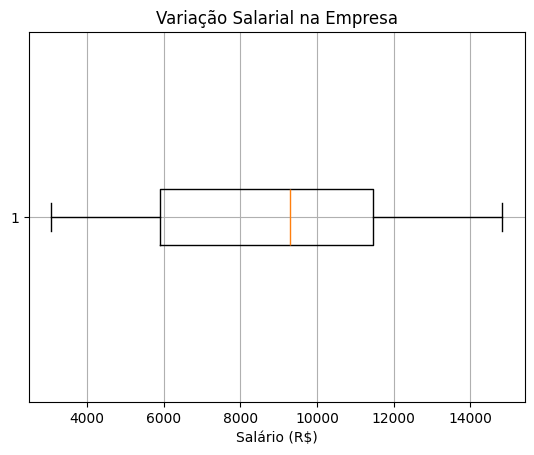

In [28]:
var_salarios = df['Salário (R$)']

plt.boxplot(var_salarios, vert=False)
plt.grid(True)
plt.xlabel('Salário (R$)')
plt.title('Variação Salarial na Empresa')
plt.show()

GRÁFICO SCATTER PLOT EM VEZ DE BARRAS
o scatter plot é um gráfico melhor para o gráfico de comparação de idade e salário. Isso porque o scatter plot é o mais indicado para visualizar correlação entre duas variáveis numéricas como idade e salário. Ele mostrará se há tend^^encia (quanto mais velho, maior o salário) e exibirá a dispersão (salários muito altos e baixo em certas idades).  O de barras seria mais indicado se fôssemos agrupar as idades por faixas e calcular a média salarial de cada faixa. Serve mais para uma análise descritiva. No gráfico gerado, parece haver uma correlação fraca entre idade e salário, pois os pontos estão muito espalhados. 

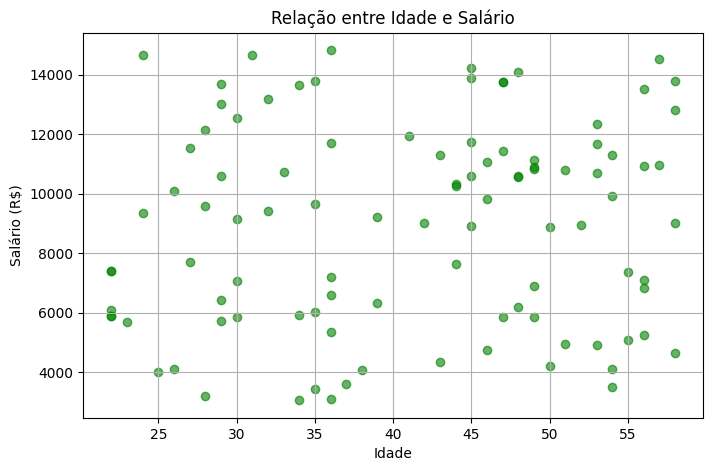

In [30]:

plt.figure(figsize=(8, 5))
plt.scatter(df['Idade'], df['Salário (R$)'], alpha=0.6, color='green')
plt.title("Relação entre Idade e Salário")
plt.xlabel("Idade")
plt.ylabel("Salário (R$)")
plt.grid(True)
plt.show()


GRÁFICO RELAÇÃO ENTRE SETOR E SATISFAÇÃO

Nesse caso, o melhor gráfiso a se usar é o gráfico de barras. Ele é a melhor opção, pois setor é uma variável categórica, enquanto satisfação é uma nota ou média. O gráfico de dispersão não faz sentido, pois ele é usado para comparar duas variáveis numéricas e setor não é um número. 

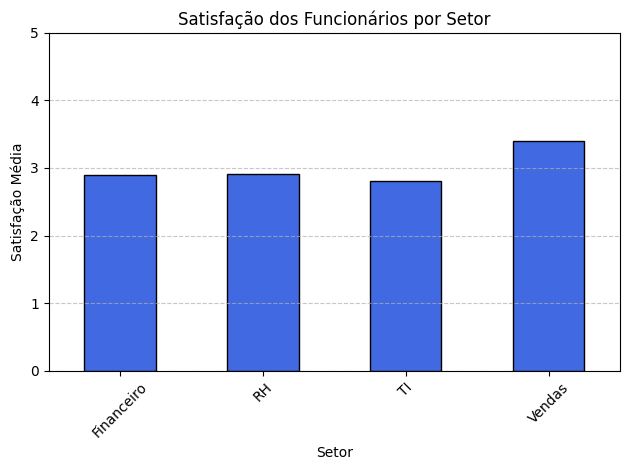

In [34]:
satisfacao = df.groupby('Setor')['Satisfação (1-5)'].mean()
satisfacao.plot(kind='bar', color='royalblue', edgecolor='black')

plt.xlabel('Setor')
plt.ylabel('Satisfação Média')
plt.title('Satisfação dos Funcionários por Setor')
plt.xticks(rotation=45)
plt.yticks(range(0, 6)) 
plt.ylim(0, 5)          
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
df

,Setor,Idade,Experiência (anos),Salário (R$),Horas de Trabalho/Semana,Satisfação (1-5)
0,RH,39,18,9225.487461,38.423171,4
1,Financeiro,47,29,11436.227507,30.729479,5
2,Vendas,55,37,7363.555229,49.364169,4
3,RH,31,11,14661.384993,35.313320,2
4,RH,57,36,14549.367539,58.213758,2
...,...,...,...,...,...,...
95,TI,58,39,9031.645117,52.735383,5
96,TI,54,34,9922.846616,30.431805,3
97,Financeiro,45,27,8910.212326,33.482179,3
98,TI,36,18,5342.915854,31.380079,1


ANÁLISE ESTATÍSTICA

1 e 2) O código tecnicamente está sem erros e é bem construído. No entanto, há algund equívos na metodologia usada e também nos resultados alcançados. Não me parece correto usar essa fórmula de cálculo para se chegar na produtividade dos funcionários da empresa. Além disso, pelo resultado obtido de 0.03 da correlação entre satisfação e horas de trabalho, sugere que não há nenhuma relação entre elas. Em relação à produtividade média, um baixo índice indica que os funcionários não estão equilibrando bem satisfação e carga horária. Já o desvio padrão calculado não é o tradicional e visa a média das distâncias absolutas entre os salários e a média salarial, chamada de desvio médio absoluto. 
Outras observações importantes: Dividir por idade pode não ser uma ideia tão boa porque nem sempre idade maior significa produtividade menor punindo pessoas mais velhas. A multiplicação de horas X satisfação pode assumir que trabalhar mais e estar satisfeito tem efeito multiplicativo e pode não refletir a realidade. Um funcionário pode estar satisfeito mesmo com uma carga de trabalho mais leve. 

In [36]:
import pandas as pd
import numpy as np

# Carregar o dataset
df = pd.read_csv('dataset_prova.csv')

df["Índice de Desempenho"] = (df["Horas de Trabalho/Semana"] * df["Satisfação (1-5)"]) / df["Idade"]
produtividade_media = df["Índice de Desempenho"].mean()
desvio_padrao = np.abs(df["Salário (R$)"] - df["Salário (R$)"].mean()).mean()
correlacao = df["Satisfação (1-5)"].corr(df["Horas de Trabalho/Semana"])

print(f"Após uma análise aprofundada dos dados, identificamos que a produtividade média na empresa é de {produtividade_media:.2f}, "
      f"o que sugere um excelente nível de eficiência entre os funcionários. Além disso, a volatilidade salarial, medida pelo desvio padrão, "
      f"é de {desvio_padrao:.2f}, confirmando uma política de remuneração estável e previsível. "
      f"Por fim, a correlação entre Satisfação e Horas de Trabalho é de {correlacao:.2f}, evidenciando que funcionários que trabalham mais tendem a ser mais satisfeitos.")

Após uma análise aprofundada dos dados, identificamos que a produtividade média na empresa é de 3.48, o que sugere um excelente nível de eficiência entre os funcionários. Além disso, a volatilidade salarial, medida pelo desvio padrão, é de 2958.72, confirmando uma política de remuneração estável e previsível. Por fim, a correlação entre Satisfação e Horas de Trabalho é de 0.03, evidenciando que funcionários que trabalham mais tendem a ser mais satisfeitos.


In [ ]:
#3

df["Índice_humanizado"] = (df["Horas de Trabalho/Semana"] + df["Satisfação (1-5)"]) / 2

produtividade_media = df["Índice_humanizado"].mean()

#calculando o desvio padrão de forma correta. 
desvio_padrao_dos_salarios = df['Salário (R$)'].std()

print (f"O desvio padrão é de = { desvio_padrao_dos_salarios:.2f}")


#mantendo a correlacao, mas com a conclusão correta. 
correlacao = df["Satisfação (1-5)"].corr(df["Horas de Trabalho/Semana"])
print (f"correlacao = { correlacao:.2f}")

print(f"Após uma análise aprofundada dos dados, identificamos que a produtividade média na empresa é de {produtividade_media:.2f}, "
      f"o que sugere um bom nível de eficiência entre os funcionários. Além disso, a volatilidade salarial, medida pelo desvio padrão, "
      f"é de {desvio_padrao_dos_salarios:.2f}, confirmando uma política de remuneração insstável e não previsível. "
      f"Por fim, a correlação entre Satisfação e Horas de Trabalho é de {correlacao:.2f}, evidenciando que a quantidade de horas trabalhadas pelos funcionários ou aqueles que trabalham mais não tendem a estarem mais satisfeitos.")


O desvio padrão é de = 3408.97
A média dos salários é de = 8945.05
correlacao = 0.03
Após uma análise aprofundada dos dados, identificamos que a produtividade média na empresa é de 24.12, o que sugere um bom nível de eficiência entre os funcionários. Além disso, a volatilidade salarial, medida pelo desvio padrão, é de 3408.97, confirmando uma política de remuneração insstável e não previsível. Por fim, a correlação entre Satisfação e Horas de Trabalho é de 0.03, evidenciando que a quantidade de horas trabalhadas pelos funcionários ou aqueles que trabalham mais não tendem a estarem mais satisfeitos.
